<a href="https://colab.research.google.com/github/Krishnan-Raghavan/Packt/blob/main/DataCleaningAndPreparationChapter8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Detect Missing Data

In [1]:
!pip install spacy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate student data with missing ages and test scores
data = {'Age': [18, 20, None, 22, 21, 19, None, 23, 18, 24, 40, 41, 45, None, 34, None, 25, 30, 32, 24, 35, 38 ],
        'Test_Score': [85, None, 90, 92, None, 88, 94, 91, None, 87, 75, 78, 80, None, 74, 20, 50, 68, None, 58, 48, 59]}

df = pd.DataFrame(data)

# Detect missing values
missing_values = df.isnull()


# Check if there are any missing values in the entire DataFrame
any_missing = missing_values.any().any()

print("Are there any missing values in the dataset?", any_missing)
print("\nMissing Values Detection:")
print(missing_values)

# Count the number of null rows
null_rows_count = df.isnull().any(axis=1).sum()

print("Count of Rows with at least one Missing Value:", null_rows_count)
print(8/len(df))

Are there any missing values in the dataset? True

Missing Values Detection:
      Age  Test_Score
0   False       False
1   False        True
2    True       False
3   False       False
4   False        True
5   False       False
6    True       False
7   False       False
8   False        True
9   False       False
10  False       False
11  False       False
12  False       False
13   True        True
14  False       False
15   True       False
16  False       False
17  False       False
18  False        True
19  False       False
20  False       False
21  False       False
Count of Rows with at least one Missing Value: 8
0.36363636363636365


Delete Missing Data

Original Dataset Statistics:
             Age  Test_Score
count  18.000000   17.000000
mean   28.277778   72.764706
std     8.750163   20.104506
min    18.000000   20.000000
25%    21.250000   59.000000
50%    24.500000   78.000000
75%    34.750000   88.000000
max    45.000000   94.000000


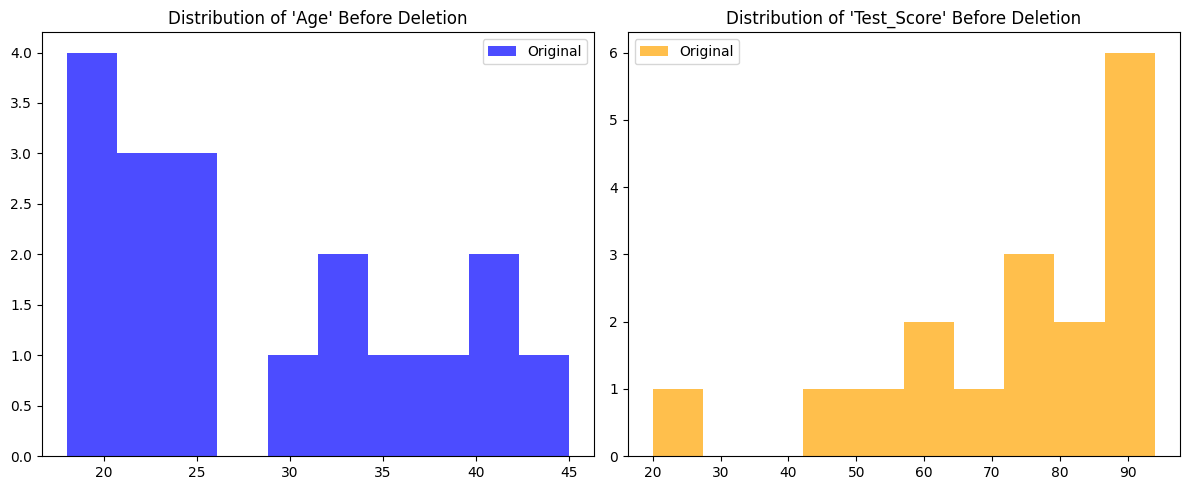


Dataset after Deleting Rows with Missing Values:
     Age  Test_Score
0   18.0        85.0
3   22.0        92.0
5   19.0        88.0
7   23.0        91.0
9   24.0        87.0
10  40.0        75.0
11  41.0        78.0
12  45.0        80.0
14  34.0        74.0
16  25.0        50.0
17  30.0        68.0
19  24.0        58.0
20  35.0        48.0
21  38.0        59.0

Dataset Statistics after Deleting Rows with Missing Values:
             Age  Test_Score
count  14.000000   14.000000
mean   29.857143   73.785714
std     8.882629   14.988091
min    18.000000   48.000000
25%    23.250000   61.250000
50%    27.500000   76.500000
75%    37.250000   86.500000
max    45.000000   92.000000


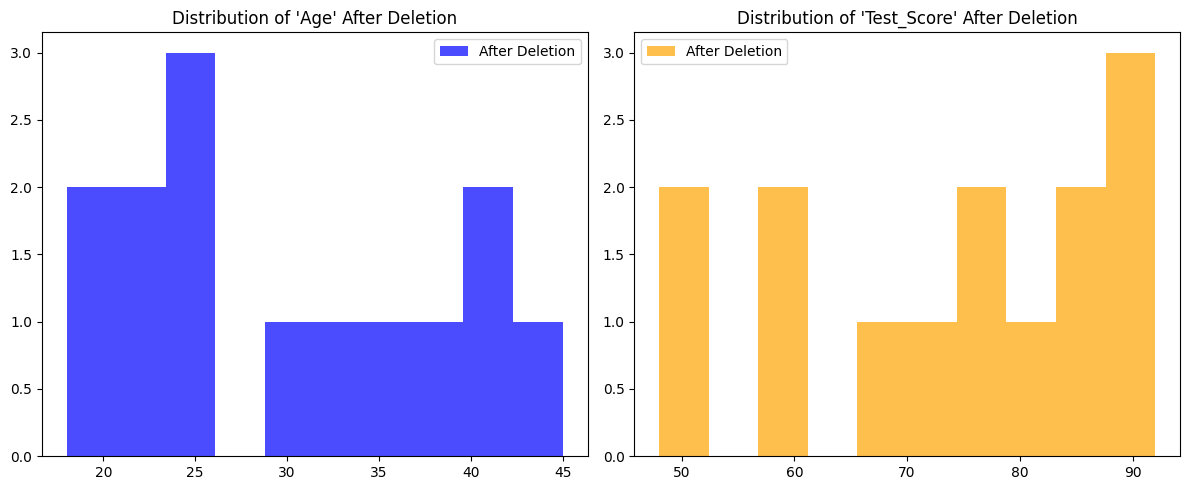


Explanation:
The rows containing missing values were removed, resulting in a smaller dataset.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate student data with missing ages and test scores
data = {'Age': [18, 20, None, 22, 21, 19, None, 23, 18, 24, 40, 41, 45, None, 34, None, 25, 30, 32, 24, 35, 38],
        'Test_Score': [85, None, 90, 92, None, 88, 94, 91, None, 87, 75, 78, 80, None, 74, 20, 50, 68, None, 58, 48, 59]}

df = pd.DataFrame(data)

# Display the original dataset statistics
print("Original Dataset Statistics:")
print(df.describe())

# Plot the distributions before deletion
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Distribution of 'Age' Before Deletion")
plt.hist(df['Age'].dropna(), bins=10, color='blue', alpha=0.7, label='Original')
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Distribution of 'Test_Score' Before Deletion")
plt.hist(df['Test_Score'].dropna(), bins=10, color='orange', alpha=0.7, label='Original')
plt.legend()

plt.tight_layout()
plt.show()

# Delete rows with any missing values
df_no_missing = df.dropna()

# Display the dataset after deletion
print("\nDataset after Deleting Rows with Missing Values:")
print(df_no_missing)

# Display the dataset statistics after deletion
print("\nDataset Statistics after Deleting Rows with Missing Values:")
print(df_no_missing.describe())

# Plot the distributions after deletion
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Distribution of 'Age' After Deletion")
plt.hist(df_no_missing['Age'], bins=10, color='blue', alpha=0.7, label='After Deletion')
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Distribution of 'Test_Score' After Deletion")
plt.hist(df_no_missing['Test_Score'], bins=10, color='orange', alpha=0.7, label='After Deletion')
plt.legend()

plt.tight_layout()
plt.show()

# Explain the changes and size drop
print("\nExplanation:")
print("The rows containing missing values were removed, resulting in a smaller dataset.")

Mean Imputation

     Age  Test_Score
0   18.0        85.0
1   20.0         NaN
2    NaN        90.0
3   22.0        92.0
4   21.0         NaN
5   19.0        88.0
6    NaN        94.0
7   23.0        91.0
8   18.0         NaN
9   24.0        87.0
10  40.0        75.0
11  41.0        78.0
12  45.0        80.0
13   NaN         NaN
14  34.0        74.0
15   NaN        20.0
16  25.0        50.0
17  30.0        68.0
18  32.0         NaN
19  24.0        58.0
20  35.0        48.0
21  38.0        59.0
Original Dataset Statistics:
             Age  Test_Score
count  18.000000   17.000000
mean   28.277778   72.764706
std     8.750163   20.104506
min    18.000000   20.000000
25%    21.250000   59.000000
50%    24.500000   78.000000
75%    34.750000   88.000000
max    45.000000   94.000000


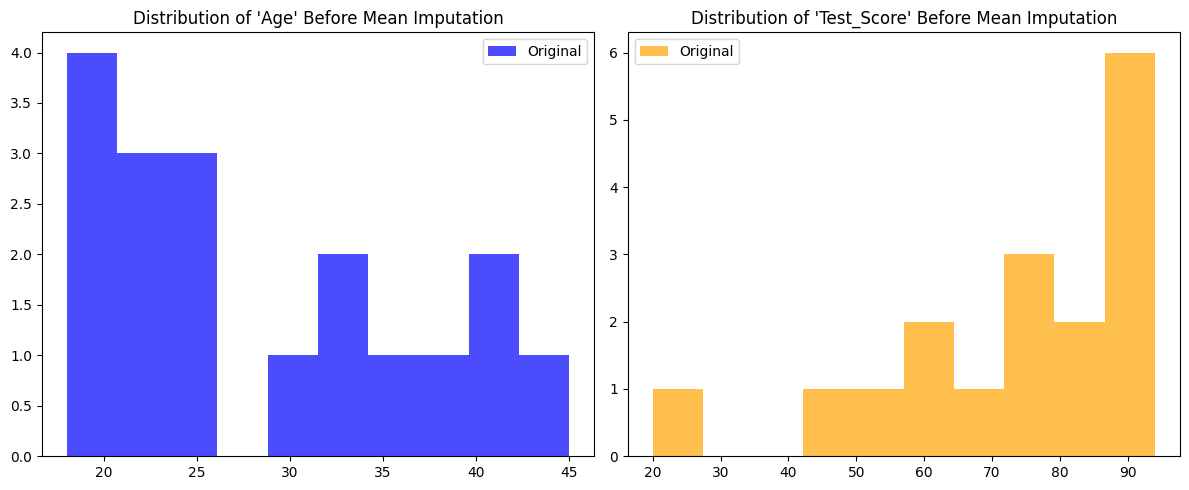


Dataset after Mean Imputation:
     Age  Test_Score
0   18.0   85.000000
1   20.0   72.764706
2   28.0   90.000000
3   22.0   92.000000
4   21.0   72.764706
5   19.0   88.000000
6   28.0   94.000000
7   23.0   91.000000
8   18.0   72.764706
9   24.0   87.000000
10  40.0   75.000000
11  41.0   78.000000
12  45.0   80.000000
13  28.0   72.764706
14  34.0   74.000000
15  28.0   20.000000
16  25.0   50.000000
17  30.0   68.000000
18  32.0   72.764706
19  24.0   58.000000
20  35.0   48.000000
21  38.0   59.000000

Dataset Statistics after Mean Imputation:
             Age  Test_Score
count  22.000000   22.000000
mean   28.227273   72.764706
std     7.873596   17.548652
min    18.000000   20.000000
25%    22.250000   69.191176
50%    28.000000   73.382353
75%    33.500000   86.500000
max    45.000000   94.000000


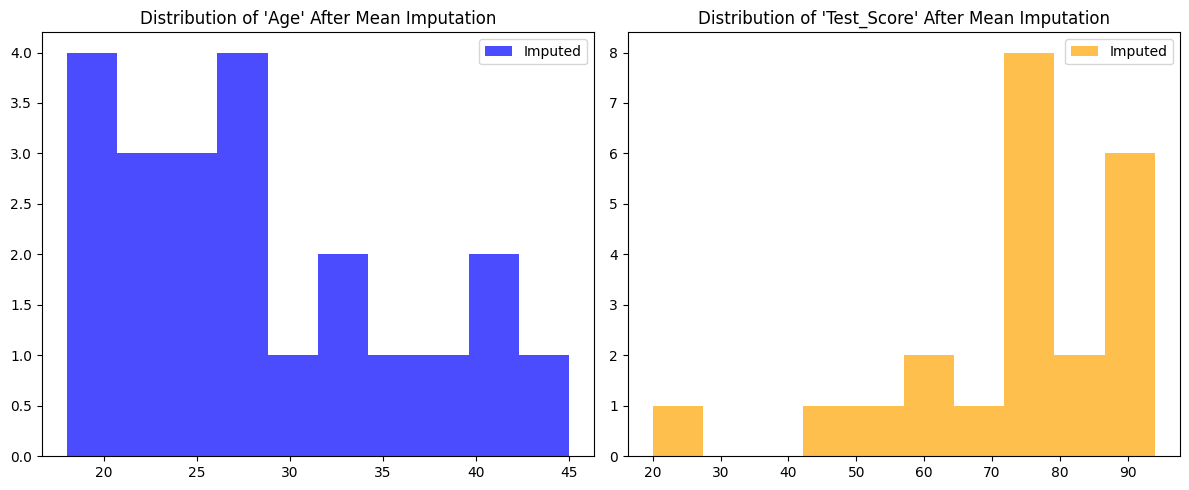

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a sample dataset with missing values
np.random.seed(42)

# Generate student data with missing ages and test scores
data = {'Age': [18, 20, None, 22, 21, 19, None, 23, 18, 24, 40, 41, 45, None, 34, None, 25, 30, 32, 24, 35, 38 ],
        'Test_Score': [85, None, 90, 92, None, 88, 94, 91, None, 87, 75, 78, 80, None, 74, 20, 50, 68, None, 58, 48, 59]}

df = pd.DataFrame(data)
print(df)

# Display the original dataset statistics
print("Original Dataset Statistics:")
print(df.describe())

# Plot the distributions before mean imputation
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Distribution of 'Age' Before Mean Imputation")
plt.hist(df['Age'].dropna(), bins=10, color='blue', alpha=0.7, label='Original')
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Distribution of 'Test_Score' Before Mean Imputation")
plt.hist(df['Test_Score'].dropna(), bins=10, color='orange', alpha=0.7, label='Original')
plt.legend()

plt.tight_layout()
plt.show()

# Mean imputation for missing ages and test scores with rounded mean for 'Age'
df_mean_imputed = df.copy()
df_mean_imputed['Age'].fillna(round(df['Age'].mean()), inplace=True)
df_mean_imputed['Test_Score'].fillna(df['Test_Score'].mean(), inplace=True)

# Display the dataset after mean imputation
print("\nDataset after Mean Imputation:")
print(df_mean_imputed)

# Display the dataset statistics after mean imputation
print("\nDataset Statistics after Mean Imputation:")
print(df_mean_imputed.describe())

# Plot the distributions after mean imputation
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Distribution of 'Age' After Mean Imputation")
plt.hist(df_mean_imputed['Age'], bins=10, color='blue', alpha=0.7, label='Imputed')
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Distribution of 'Test_Score' After Mean Imputation")
plt.hist(df_mean_imputed['Test_Score'], bins=10, color='orange', alpha=0.7, label='Imputed')
plt.legend()

plt.tight_layout()
plt.show()

Median Imputation

Original Dataset Statistics:
             Age  Test_Score
count  18.000000   17.000000
mean   28.277778   72.764706
std     8.750163   20.104506
min    18.000000   20.000000
25%    21.250000   59.000000
50%    24.500000   78.000000
75%    34.750000   88.000000
max    45.000000   94.000000


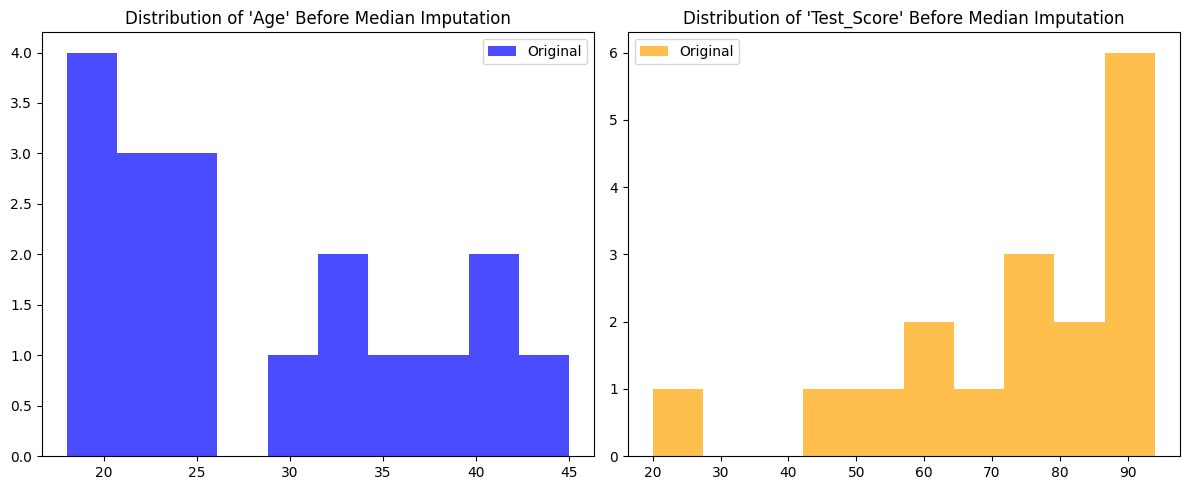


Dataset after Median Imputation:
     Age  Test_Score
0   18.0        85.0
1   20.0        78.0
2   24.5        90.0
3   22.0        92.0
4   21.0        78.0
5   19.0        88.0
6   24.5        94.0
7   23.0        91.0
8   18.0        78.0
9   24.0        87.0
10  40.0        75.0
11  41.0        78.0
12  45.0        80.0
13  24.5        78.0
14  34.0        74.0
15  24.5        20.0
16  25.0        50.0
17  30.0        68.0
18  32.0        78.0
19  24.0        58.0
20  35.0        48.0
21  38.0        59.0

Dataset Statistics after Median Imputation:
             Age  Test_Score
count  22.000000   22.000000
mean   27.590909   73.954545
std     8.012841   17.691745
min    18.000000   20.000000
25%    22.250000   69.500000
50%    24.500000   78.000000
75%    33.500000   86.500000
max    45.000000   94.000000


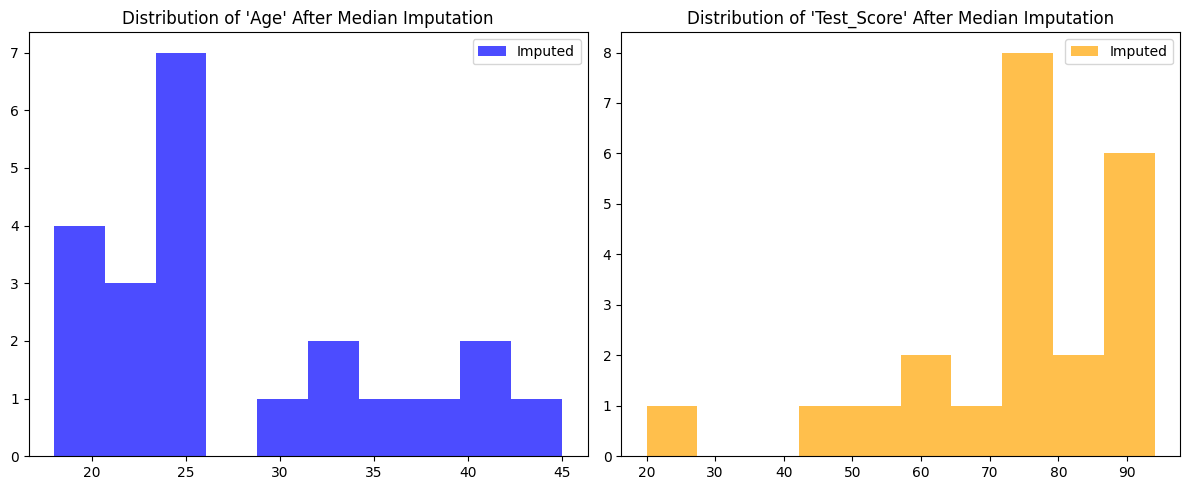

24.5


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Generate student data with missing ages and test scores
data = {'Age': [18, 20, None, 22, 21, 19, None, 23, 18, 24, 40, 41, 45, None, 34, None, 25, 30, 32, 24, 35, 38 ],
        'Test_Score': [85, None, 90, 92, None, 88, 94, 91, None, 87, 75, 78, 80, None, 74, 20, 50, 68, None, 58, 48, 59]}

df = pd.DataFrame(data)

# Display the original dataset statistics
print("Original Dataset Statistics:")
print(df.describe())

# Plot the distributions before median imputation
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Distribution of 'Age' Before Median Imputation")
plt.hist(df['Age'].dropna(), bins=10, color='blue', alpha=0.7, label='Original')
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Distribution of 'Test_Score' Before Median Imputation")
plt.hist(df['Test_Score'].dropna(), bins=10, color='orange', alpha=0.7, label='Original')
plt.legend()

plt.tight_layout()
plt.show()

# Median imputation for missing ages and test scores
df_median_imputed = df.copy()
df_median_imputed['Age'].fillna(df['Age'].median(), inplace=True)
df_median_imputed['Test_Score'].fillna(df['Test_Score'].median(), inplace=True)

# Display the dataset after median imputation
print("\nDataset after Median Imputation:")
print(df_median_imputed)

# Display the dataset statistics after median imputation
print("\nDataset Statistics after Median Imputation:")
print(df_median_imputed.describe())

# Plot the distributions after median imputation
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Distribution of 'Age' After Median Imputation")
plt.hist(df_median_imputed['Age'], bins=10, color='blue', alpha=0.7, label='Imputed')
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Distribution of 'Test_Score' After Median Imputation")
plt.hist(df_median_imputed['Test_Score'], bins=10, color='orange', alpha=0.7, label='Imputed')
plt.legend()

plt.tight_layout()
plt.show()


print(df['Age'].median())

Indicator Imputation

Original Dataset:
     Age  Test_Score  Age_missing  Test_Score_missing
0   18.0        85.0            0                   0
1   20.0         NaN            0                   1
2    NaN        90.0            1                   0
3   22.0        92.0            0                   0
4   21.0         NaN            0                   1
5   19.0        88.0            0                   0
6    NaN        94.0            1                   0
7   23.0        91.0            0                   0
8   18.0         NaN            0                   1
9   24.0        87.0            0                   0
10  40.0        75.0            0                   0
11  41.0        78.0            0                   0
12  45.0        80.0            0                   0
13   NaN         NaN            1                   1
14  34.0        74.0            0                   0
15   NaN        20.0            1                   0
16  25.0        50.0            0                   0
17  30.0  

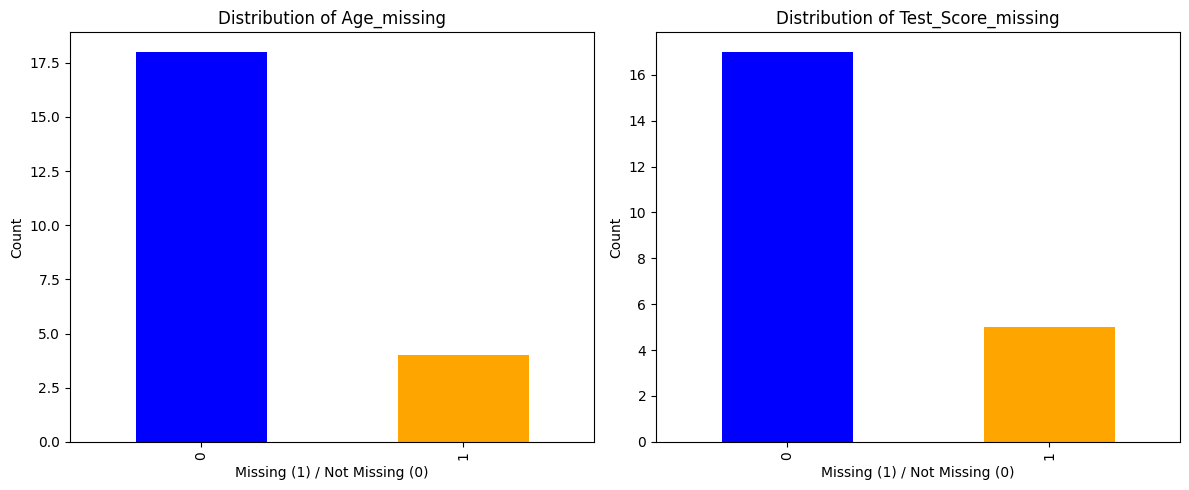

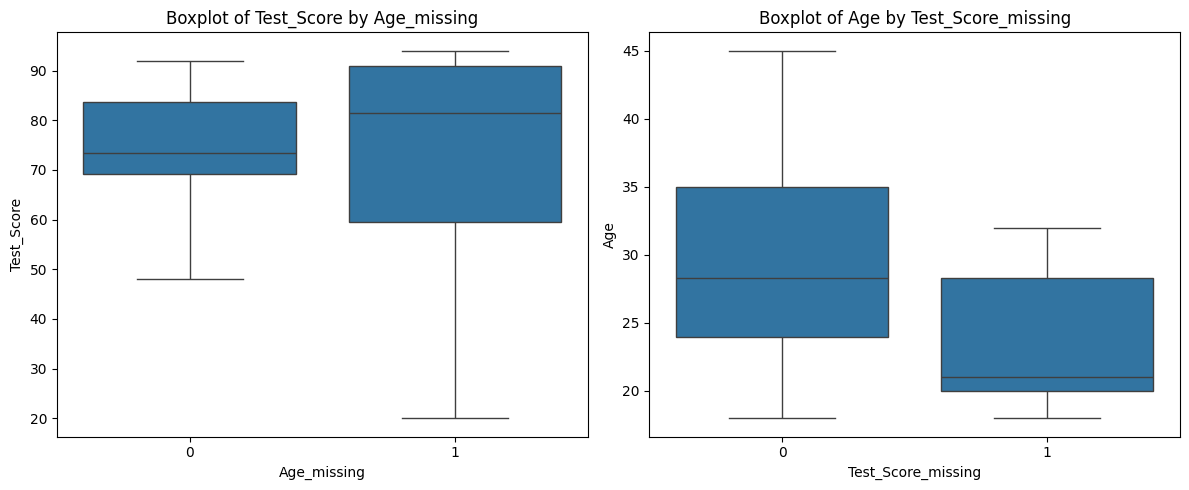

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a sample dataset with missing values
np.random.seed(42)

data = {'Age': [18, 20, None, 22, 21, 19, None, 23, 18, 24, 40, 41, 45, None, 34, None, 25, 30, 32, 24, 35, 38 ],
        'Test_Score': [85, None, 90, 92, None, 88, 94, 91, None, 87, 75, 78, 80, None, 74, 20, 50, 68, None, 58, 48, 59]}

df = pd.DataFrame(data)

# Create indicator variables for missing values
df['Age_missing'] = df['Age'].isnull().astype(int)
df['Test_Score_missing'] = df['Test_Score'].isnull().astype(int)

# Display the original dataset
print("Original Dataset:")
print(df)

# Impute missing values with a placeholder (e.g., mean or median)
df_imputed = df.copy()
df_imputed['Age'].fillna(df_imputed['Age'].mean(), inplace=True)
df_imputed['Test_Score'].fillna(df_imputed['Test_Score'].mean(), inplace=True)

# Display the dataset after imputation
print("\nDataset after Indicator Variable Imputation:")
print(df_imputed)

# Plot distribution charts for indicator variables
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Distribution of Age_missing")
df['Age_missing'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.xlabel("Missing (1) / Not Missing (0)")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
plt.title("Distribution of Test_Score_missing")
df['Test_Score_missing'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.xlabel("Missing (1) / Not Missing (0)")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

import seaborn as sns

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='Age_missing', y='Test_Score', data=df_imputed)
plt.title("Boxplot of Test_Score by Age_missing")

plt.subplot(1, 2, 2)
sns.boxplot(x='Test_Score_missing', y='Age', data=df_imputed)
plt.title("Boxplot of Age by Test_Score_missing")

plt.tight_layout()
plt.show()

Identify Univariate Outliers

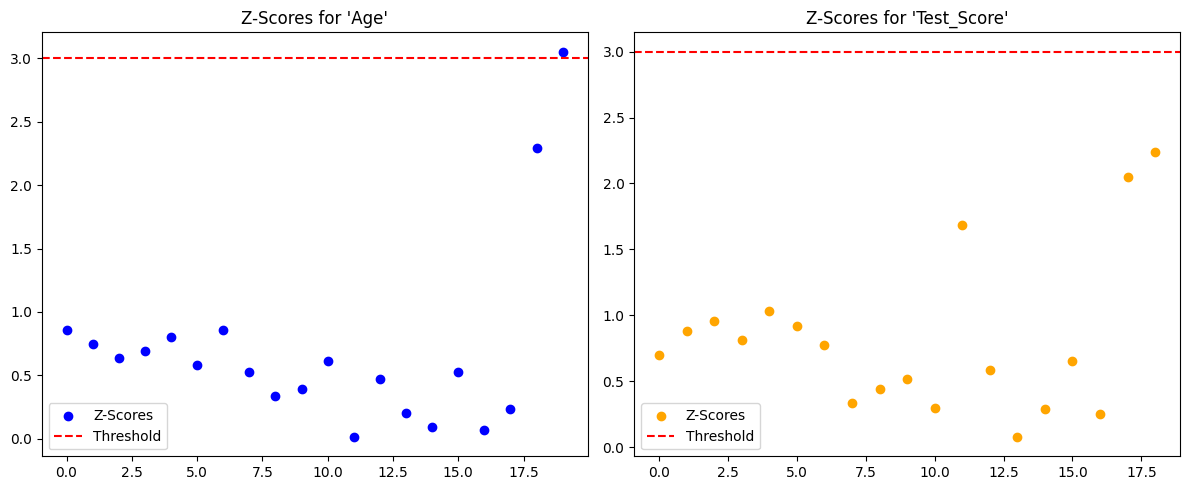

Outliers in 'Age':
     Age  Test_Score
22  76.0        10.0
23  90.0         5.0

Outliers in 'Test_Score':
Empty DataFrame
Columns: [Age, Test_Score]
Index: []


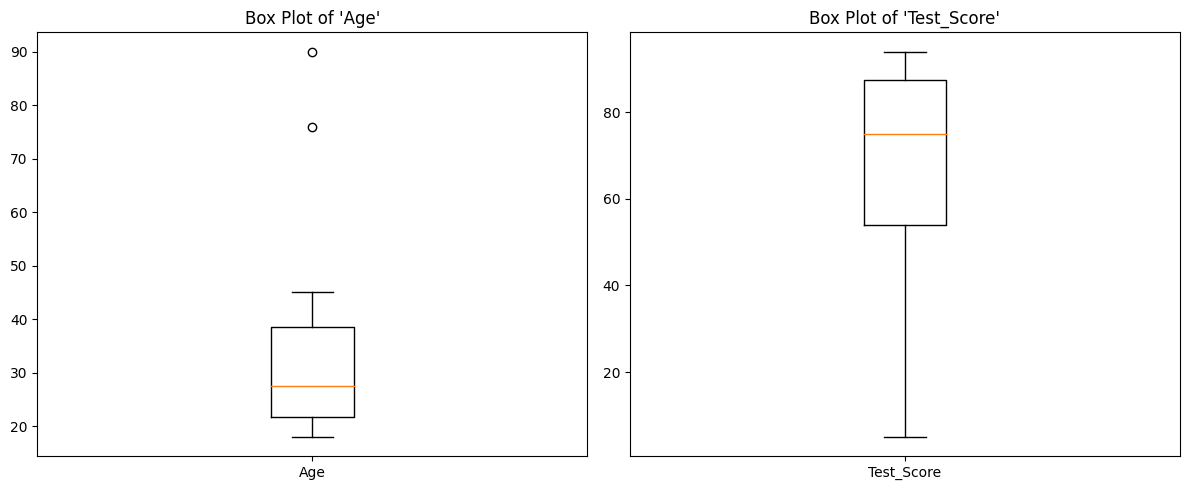

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Original dataset
data = {'Age': [18, 20, None, 22, 21, 19, None, 23, 18, 24, 40, 41, 45, None, 34, None, 25, 30, 32, 24, 35, 38, 76, 90],
        'Test_Score': [85, None, 90, 92, None, 88, 94, 91, None, 87, 75, 78, 80, None, 74, 20, 50, 68, None, 58, 48, 59, 10, 5]}

df = pd.DataFrame(data)

# Calculate Z-Scores for each column
z_scores_age = np.abs(stats.zscore(df['Age'].dropna()))
z_scores_test_score = np.abs(stats.zscore(df['Test_Score'].dropna()))

# Set Z-Score threshold
z_threshold = 3

# Identify outliers
outliers_age = np.where(z_scores_age > z_threshold)[0]
outliers_test_score = np.where(z_scores_test_score > z_threshold)[0]

# Plot Z-Scores
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Z-Scores for 'Age'")
plt.scatter(range(len(z_scores_age)), z_scores_age, color='blue', label='Z-Scores')
plt.axhline(y=z_threshold, color='red', linestyle='--', label='Threshold')
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Z-Scores for 'Test_Score'")
plt.scatter(range(len(z_scores_test_score)), z_scores_test_score, color='orange', label='Z-Scores')
plt.axhline(y=z_threshold, color='red', linestyle='--', label='Threshold')
plt.legend()

plt.tight_layout()
plt.show()

# Function to identify outliers using IQR
def identify_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Identify and print outliers for 'Age'
age_outliers = identify_outliers('Age')
print("Outliers in 'Age':")
print(age_outliers)

# Identify and print outliers for 'Test_Score'
test_score_outliers = identify_outliers('Test_Score')
print("\nOutliers in 'Test_Score':")
print(test_score_outliers)

# Visualize the distribution of 'Age' and 'Test_Score' using box plots
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Box Plot of 'Age'")
plt.boxplot(df['Age'].dropna())
plt.xticks([1], ['Age'])

plt.subplot(1, 2, 2)
plt.title("Box Plot of 'Test_Score'")
plt.boxplot(df['Test_Score'].dropna())
plt.xticks([1], ['Test_Score'])

plt.tight_layout()
plt.show()

Handle Univariate Outliers Deletions

Original Dataset Statistics:
             Age  Test_Score
count  24.000000   24.000000
mean   33.750000   65.894737
std    17.181575   24.761286
min    18.000000    5.000000
25%    22.750000   58.750000
50%    32.875000   66.947368
75%    35.750000   85.500000
max    90.000000   94.000000


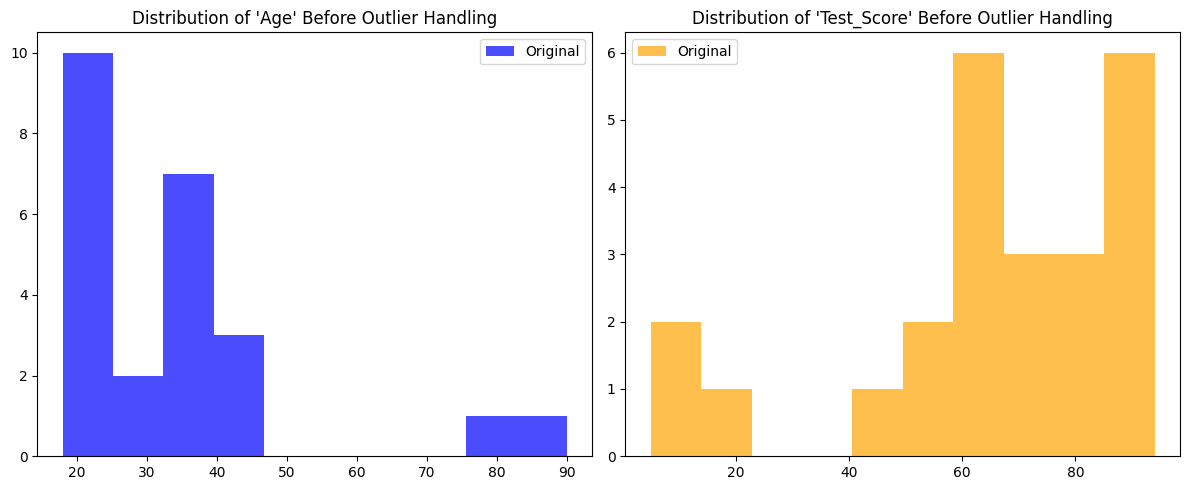


Dataset after Outlier Handling:
      Age  Test_Score
0   18.00   85.000000
1   20.00   65.894737
2   33.75   90.000000
3   22.00   92.000000
4   21.00   65.894737
5   19.00   88.000000
6   33.75   94.000000
7   23.00   91.000000
8   18.00   65.894737
9   24.00   87.000000
10  40.00   75.000000
11  41.00   78.000000
12  45.00   80.000000
13  33.75   65.894737
14  34.00   74.000000
15  33.75   20.000000
16  25.00   50.000000
17  30.00   68.000000
18  32.00   65.894737
19  24.00   58.000000
20  35.00   48.000000
21  38.00   59.000000

Dataset Statistics after Outlier Handling:
             Age  Test_Score
count  22.000000   22.000000
mean   29.272727   71.203349
std     8.163839   17.794339
min    18.000000   20.000000
25%    22.250000   65.894737
50%    31.000000   71.000000
75%    33.937500   86.500000
max    45.000000   94.000000


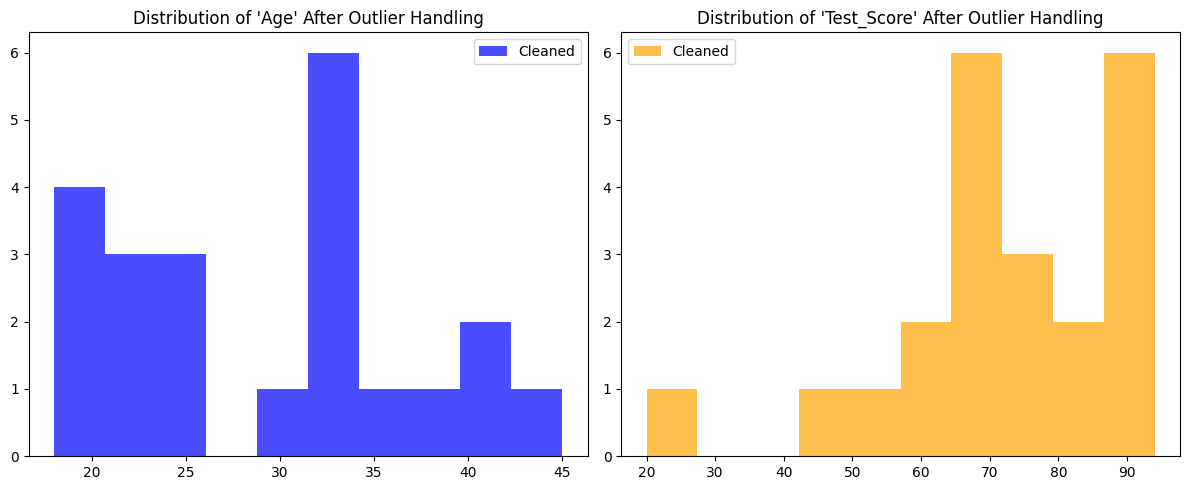

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate student data with missing ages and test scores
data = {'Age': [18, 20, None, 22, 21, 19, None, 23, 18, 24, 40, 41, 45, None, 34, None, 25, 30, 32, 24, 35, 38, 76, 90],
        'Test_Score': [85, None, 90, 92, None, 88, 94, 91, None, 87, 75, 78, 80, None, 74, 20, 50, 68, None, 58, 48, 59, 10, 5]}

df = pd.DataFrame(data)

# Fill NaN values with the mean of each column
df.fillna(df.mean(), inplace=True)

# Display the original dataset statistics
print("Original Dataset Statistics:")
print(df.describe())

# Plot the distributions before outlier handling
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Distribution of 'Age' Before Outlier Handling")
plt.hist(df['Age'], bins=10, color='blue', alpha=0.7, label='Original')
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Distribution of 'Test_Score' Before Outlier Handling")
plt.hist(df['Test_Score'], bins=10, color='orange', alpha=0.7, label='Original')
plt.legend()

plt.tight_layout()
plt.show()

# Identify and handle outliers using interquartile range (IQR)
Q1 = df['Test_Score'].quantile(0.25)
Q3 = df['Test_Score'].quantile(0.75)
IQR = Q3 - Q1

outlier_threshold = 1.5
lower_bound = Q1 - outlier_threshold * IQR
upper_bound = Q3 + outlier_threshold * IQR

df_no_outliers = df[(df['Test_Score'] >= lower_bound) & (df['Test_Score'] <= upper_bound)].copy()

# Display the dataset after outlier handling
print("\nDataset after Outlier Handling:")
print(df_no_outliers)

# Display the dataset statistics after outlier handling
print("\nDataset Statistics after Outlier Handling:")
print(df_no_outliers.describe())

# Plot the distributions after outlier handling
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Distribution of 'Age' After Outlier Handling")
plt.hist(df_no_outliers['Age'], bins=10, color='blue', alpha=0.7, label='Cleaned')
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Distribution of 'Test_Score' After Outlier Handling")
plt.hist(df_no_outliers['Test_Score'], bins=10, color='orange', alpha=0.7, label='Cleaned')
plt.legend()

plt.tight_layout()
plt.show()

Trimming

Original Dataset Statistics:
             Age  Test_Score
count  24.000000   24.000000
mean   33.750000   65.894737
std    17.181575   24.761286
min    18.000000    5.000000
25%    22.750000   58.750000
50%    32.875000   66.947368
75%    35.750000   85.500000
max    90.000000   94.000000


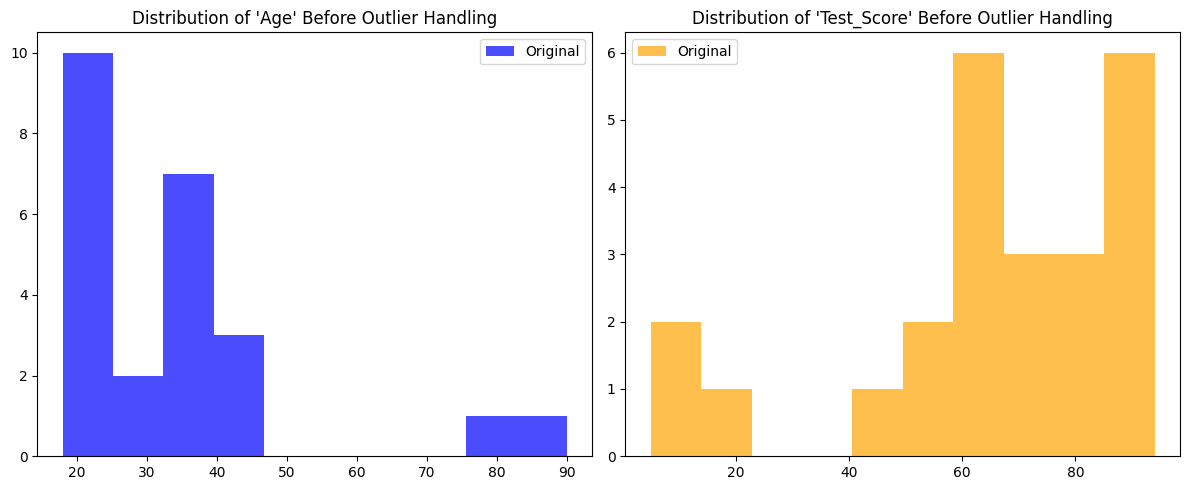


Trimmed Dataset Statistics:
             Age  Test_Score
count  18.000000   18.000000
mean   30.222222   69.309942
std     6.757833   18.797436
min    20.000000   20.000000
25%    24.000000   60.723684
50%    32.875000   66.947368
75%    33.937500   84.750000
max    41.000000   94.000000

Trimmed Mean:
Age           30.222222
Test_Score    69.309942
dtype: float64


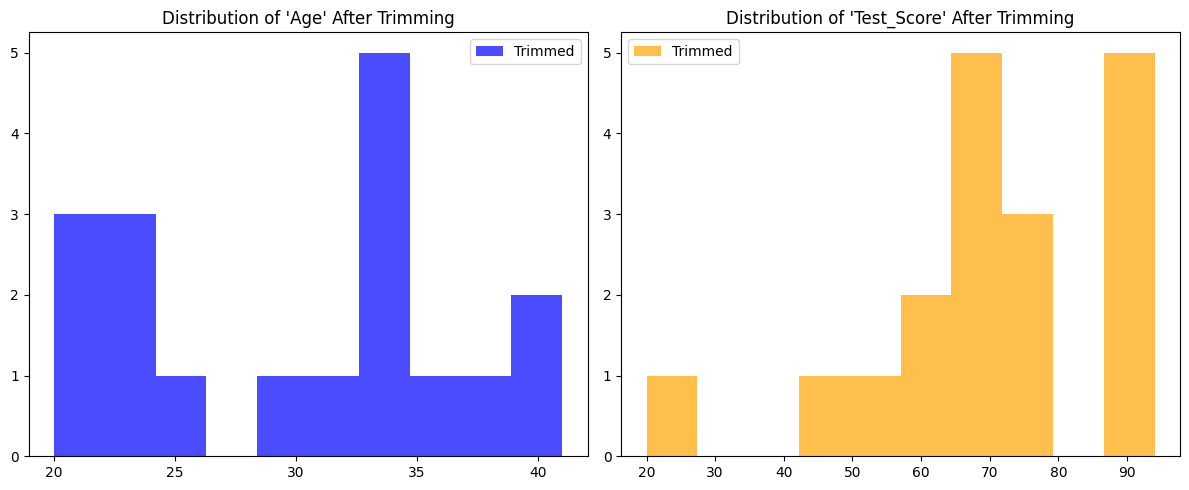

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate student data with missing ages and test scores
data = {'Age': [18, 20, None, 22, 21, 19, None, 23, 18, 24, 40, 41, 45, None, 34, None, 25, 30, 32, 24, 35, 38, 76, 90],
        'Test_Score': [85, None, 90, 92, None, 88, 94, 91, None, 87, 75, 78, 80, None, 74, 20, 50, 68, None, 58, 48, 59, 10, 5]}

df = pd.DataFrame(data)

# Fill NaN values with the mean of each column
df.fillna(df.mean(), inplace=True)

# Display the original dataset statistics
print("Original Dataset Statistics:")
print(df.describe())

# Plot the distributions before outlier handling
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Distribution of 'Age' Before Outlier Handling")
plt.hist(df['Age'], bins=10, color='blue', alpha=0.7, label='Original')
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Distribution of 'Test_Score' Before Outlier Handling")
plt.hist(df['Test_Score'], bins=10, color='orange', alpha=0.7, label='Original')
plt.legend()

plt.tight_layout()
plt.show()

# Drop the 10% of values on each side of the distribution for 'Age' column
df_trimmed = df[(df['Age'] >= df['Age'].quantile(0.1)) & (df['Age'] <= df['Age'].quantile(0.9))]

# Calculate trimmed mean for each column
df_trimmed_mean = df_trimmed.mean()

# Display the trimmed dataset statistics
print("\nTrimmed Dataset Statistics:")
print(df_trimmed.describe())

# Display the trimmed mean for each column
print("\nTrimmed Mean:")
print(df_trimmed_mean)

# Plot the distributions after trimming
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Distribution of 'Age' After Trimming")
plt.hist(df_trimmed['Age'], bins=10, color='blue', alpha=0.7, label='Trimmed')
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Distribution of 'Test_Score' After Trimming")
plt.hist(df_trimmed['Test_Score'], bins=10, color='orange', alpha=0.7, label='Trimmed')
plt.legend()

plt.tight_layout()
plt.show()

Winsorizing

Original Dataset Statistics:
             Age  Test_Score
count  24.000000   24.000000
mean   33.750000   65.894737
std    17.181575   24.761286
min    18.000000    5.000000
25%    22.750000   58.750000
50%    32.875000   66.947368
75%    35.750000   85.500000
max    90.000000   94.000000


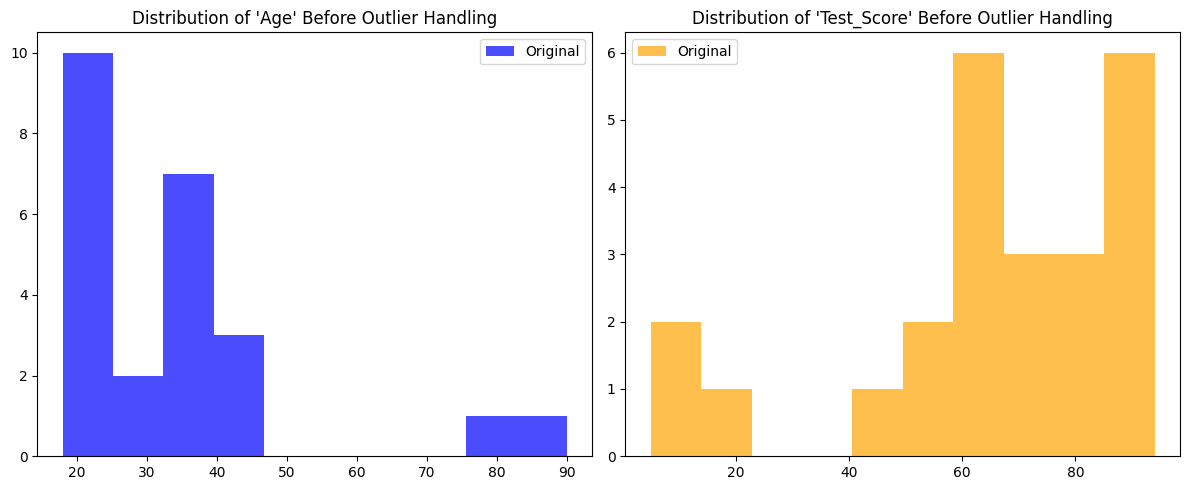


Dataset after Winsorizing:
      Age  Test_Score  Age_Winsorized
0   18.00   85.000000           19.00
1   20.00   65.894737           20.00
2   33.75   90.000000           33.75
3   22.00   92.000000           22.00
4   21.00   65.894737           21.00
5   19.00   88.000000           19.00
6   33.75   94.000000           33.75
7   23.00   91.000000           23.00
8   18.00   65.894737           19.00
9   24.00   87.000000           24.00
10  40.00   75.000000           40.00
11  41.00   78.000000           41.00
12  45.00   80.000000           45.00
13  33.75   65.894737           33.75
14  34.00   74.000000           34.00
15  33.75   20.000000           33.75
16  25.00   50.000000           25.00
17  30.00   68.000000           30.00
18  32.00   65.894737           32.00
19  24.00   58.000000           24.00
20  35.00   48.000000           35.00
21  38.00   59.000000           38.00
22  76.00   10.000000           45.00
23  90.00    5.000000           45.00

Dataset Statistics af

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


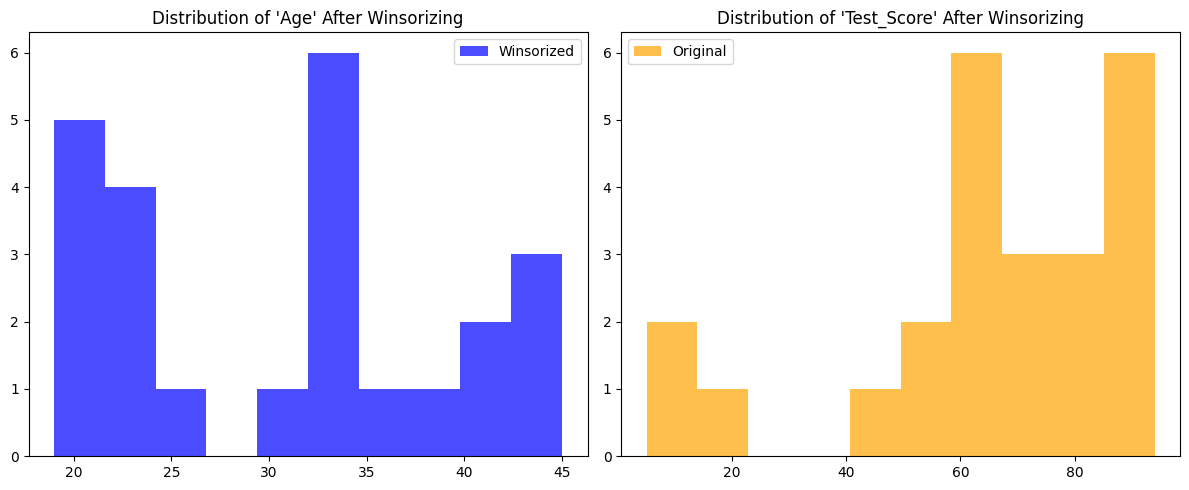

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize

# Generate student data with missing ages and test scores
data = {'Age': [18, 20, None, 22, 21, 19, None, 23, 18, 24, 40, 41, 45, None, 34, None, 25, 30, 32, 24, 35, 38, 76, 90],
        'Test_Score': [85, None, 90, 92, None, 88, 94, 91, None, 87, 75, 78, 80, None, 74, 20, 50, 68, None, 58, 48, 59, 10, 5]}

df = pd.DataFrame(data)

# Fill NaN values with the mean of each column
df.fillna(df.mean(), inplace=True)

# Display the original dataset statistics
print("Original Dataset Statistics:")
print(df.describe())

# Plot the distributions before outlier handling
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Distribution of 'Age' Before Outlier Handling")
plt.hist(df['Age'], bins=10, color='blue', alpha=0.7, label='Original')
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Distribution of 'Test_Score' Before Outlier Handling")
plt.hist(df['Test_Score'], bins=10, color='orange', alpha=0.7, label='Original')
plt.legend()

plt.tight_layout()
plt.show()

# Identify and handle outliers using winsorizing for 'Age' column
winsorizing_fraction = 0.1
df['Age_Winsorized'] = winsorize(df['Age'], limits=[winsorizing_fraction, winsorizing_fraction])

# Display the dataset after winsorizing
print("\nDataset after Winsorizing:")
print(df)

# Display the dataset statistics after winsorizing
print("\nDataset Statistics after Winsorizing:")
print(df.describe())

# Plot the distributions after winsorizing
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Distribution of 'Age' After Winsorizing")
plt.hist(df['Age_Winsorized'], bins=10, color='blue', alpha=0.7, label='Winsorized')
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Distribution of 'Test_Score' After Winsorizing")
plt.hist(df['Test_Score'], bins=10, color='orange', alpha=0.7, label='Original')
plt.legend()

plt.tight_layout()
plt.show()

Data Transformation

Original Dataset Statistics:
             Age  Test_Score
count  24.000000   24.000000
mean   33.750000   65.894737
std    17.181575   24.761286
min    18.000000    5.000000
25%    22.750000   58.750000
50%    32.875000   66.947368
75%    35.750000   85.500000
max    90.000000   94.000000


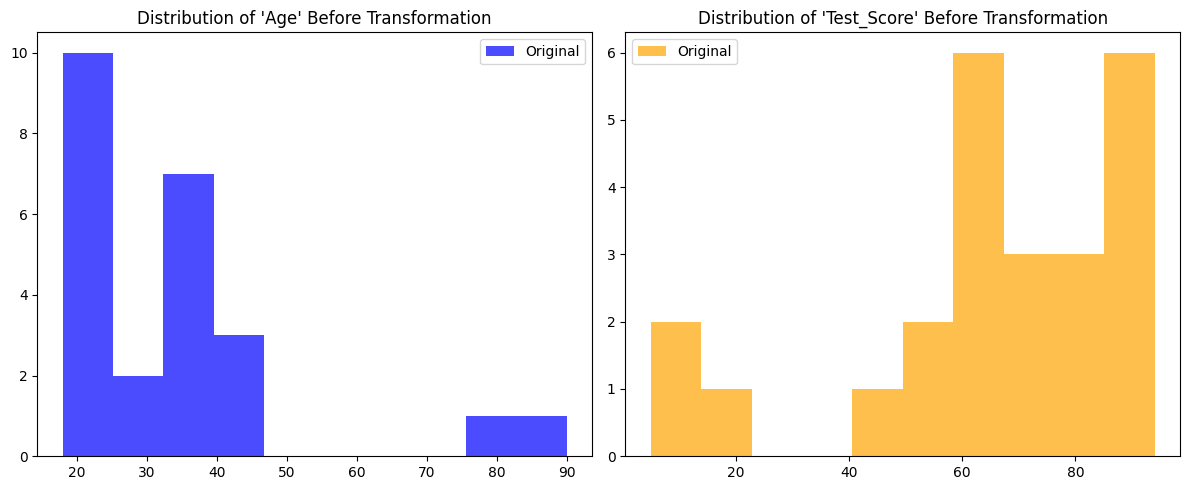


Dataset after Logarithmic Transformation:
             Age  Test_Score
count  24.000000   24.000000
mean    3.462073    4.059624
std     0.398871    0.687214
min     2.944439    1.791759
25%     3.167414    4.090143
50%     3.522344    4.218613
75%     3.603530    4.460095
max     4.510860    4.553877

Dataset after Square Root Transformation:
             Age  Test_Score
count  24.000000   24.000000
mean    5.671127    7.886679
std     1.287393    1.963592
min     4.242641    2.236068
25%     4.769478    7.664803
50%     5.733165    8.181884
75%     5.978163    9.246503
max     9.486833    9.695360


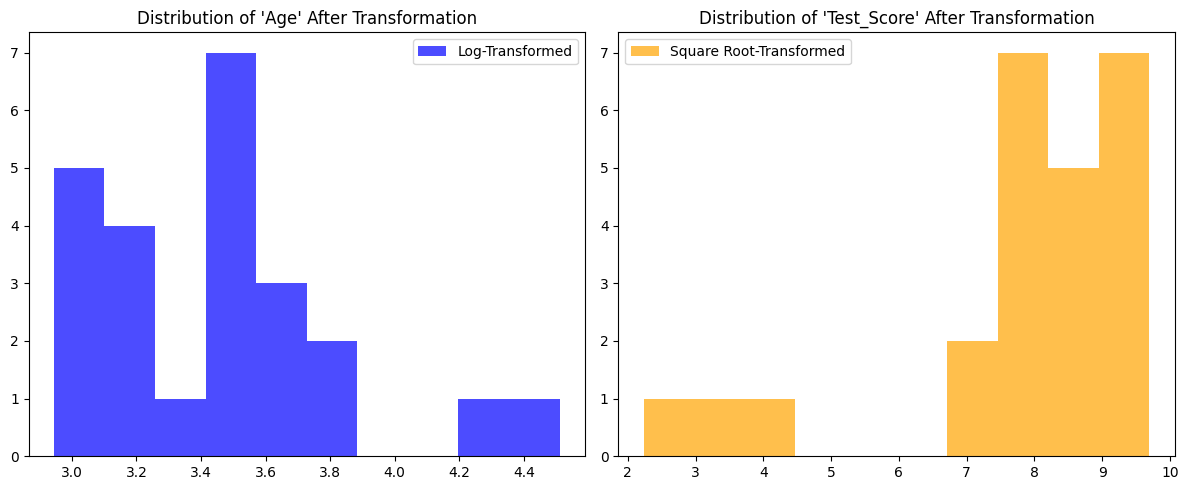

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate student data with missing ages and test scores
data = {'Age': [18, 20, None, 22, 21, 19, None, 23, 18, 24, 40, 41, 45, None, 34, None, 25, 30, 32, 24, 35, 38, 76, 90],
        'Test_Score': [85, None, 90, 92, None, 88, 94, 91, None, 87, 75, 78, 80, None, 74, 20, 50, 68, None, 58, 48, 59, 10, 5]}

df = pd.DataFrame(data)

# Fill NaN values with the mean of each column
df.fillna(df.mean(), inplace=True)

# Display the original dataset statistics
print("Original Dataset Statistics:")
print(df.describe())

# Plot the distributions before outlier handling
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Distribution of 'Age' Before Transformation")
plt.hist(df['Age'], bins=10, color='blue', alpha=0.7, label='Original')
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Distribution of 'Test_Score' Before Transformation")
plt.hist(df['Test_Score'], bins=10, color='orange', alpha=0.7, label='Original')
plt.legend()

plt.tight_layout()
plt.show()

# Apply logarithmic transformation to 'Age' and 'Test_Score'
df_log_transformed = df.copy()
df_log_transformed['Age'] = np.log1p(df_log_transformed['Age'])
df_log_transformed['Test_Score'] = np.log1p(df_log_transformed['Test_Score'])

# Display the dataset after logarithmic transformation
print("\nDataset after Logarithmic Transformation:")
print(df_log_transformed.describe())

# Apply square root transformation to 'Age' and 'Test_Score'
df_sqrt_transformed = df.copy()
df_sqrt_transformed['Age'] = np.sqrt(df_sqrt_transformed['Age'])
df_sqrt_transformed['Test_Score'] = np.sqrt(df_sqrt_transformed['Test_Score'])

# Display the dataset after square root transformation
print("\nDataset after Square Root Transformation:")
print(df_sqrt_transformed.describe())

# Plot the distributions after transformation
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Distribution of 'Age' After Transformation")
plt.hist(df_log_transformed['Age'], bins=10, color='blue', alpha=0.7, label='Log-Transformed')
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Distribution of 'Test_Score' After Transformation")
plt.hist(df_sqrt_transformed['Test_Score'], bins=10, color='orange', alpha=0.7, label='Square Root-Transformed')
plt.legend()

plt.tight_layout()
plt.show()

Outliers Visualisation

Outliers in 'Age': [24.0]
Outliers in 'Test_Score': []


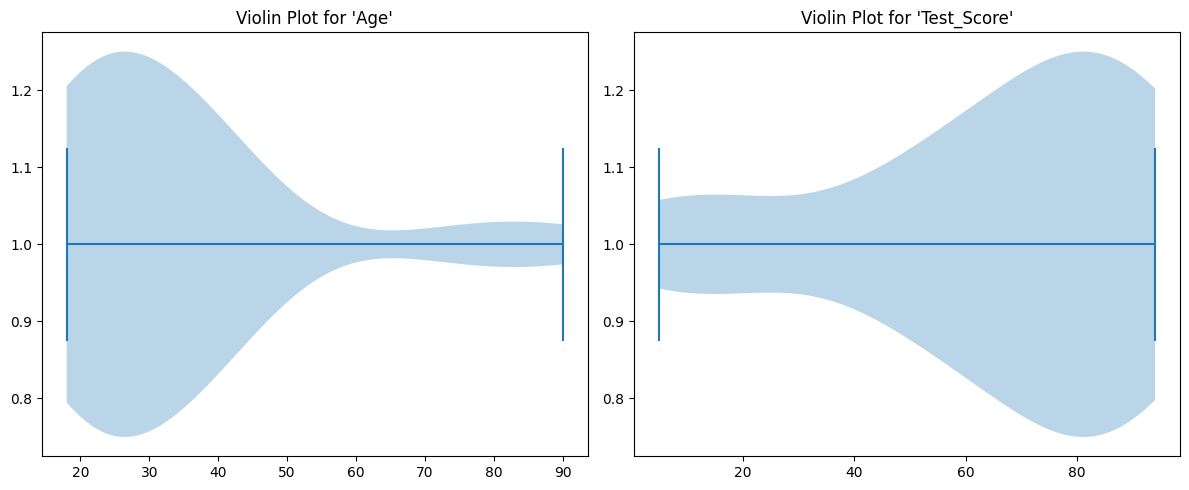

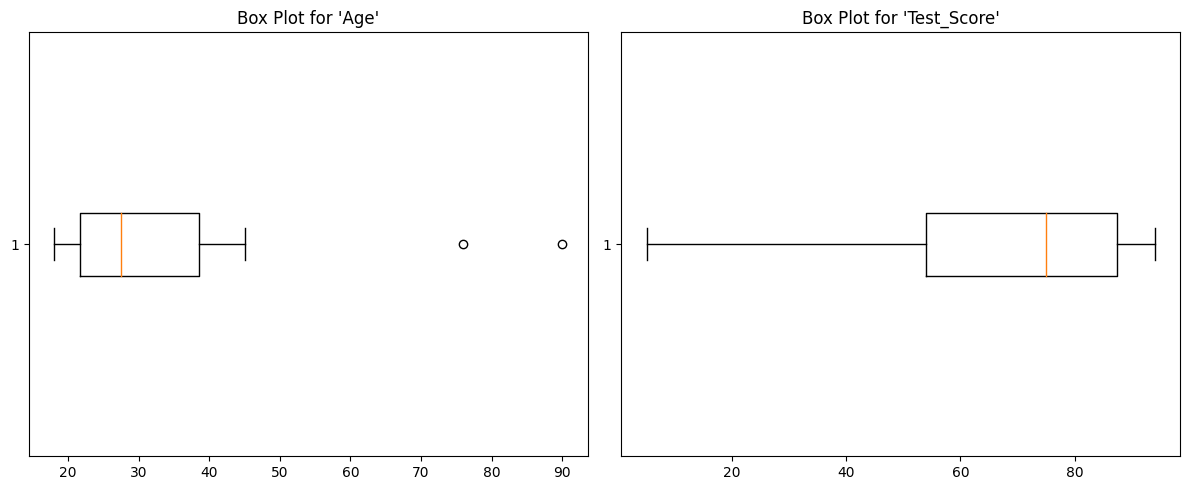

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Original dataset
data = {'Age': [18, 20, None, 22, 21, 19, None, 23, 18, 24, 40, 41, 45, None, 34, None, 25, 30, 32, 24, 35, 38, 76, 90],
        'Test_Score': [85, None, 90, 92, None, 88, 94, 91, None, 87, 75, 78, 80, None, 74, 20, 50, 68, None, 58, 48, 59, 10, 5]}

df = pd.DataFrame(data)

# Calculate Z-Scores for each column
z_scores_age = np.abs(stats.zscore(df['Age'].dropna()))
z_scores_test_score = np.abs(stats.zscore(df['Test_Score'].dropna()))

# Set Z-Score threshold
z_threshold = 3

# Identify outliers
outliers_age = np.where(z_scores_age > z_threshold)[0]
outliers_test_score = np.where(z_scores_test_score > z_threshold)[0]

# Output identified outliers
print("Outliers in 'Age':", df['Age'].iloc[outliers_age].to_list())
print("Outliers in 'Test_Score':", df['Test_Score'].iloc[outliers_test_score].to_list())

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Violin Plot for 'Age'")
plt.violinplot(df['Age'].dropna(), vert=False)

plt.subplot(1, 2, 2)
plt.title("Violin Plot for 'Test_Score'")
plt.violinplot(df['Test_Score'].dropna(), vert=False)

plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Box Plot for 'Age'")
plt.boxplot(df['Age'].dropna(), vert=False)

plt.subplot(1, 2, 2)
plt.title("Box Plot for 'Test_Score'")
plt.boxplot(df['Test_Score'].dropna(), vert=False)

plt.tight_layout()
plt.show()

Mahalanobis Distance

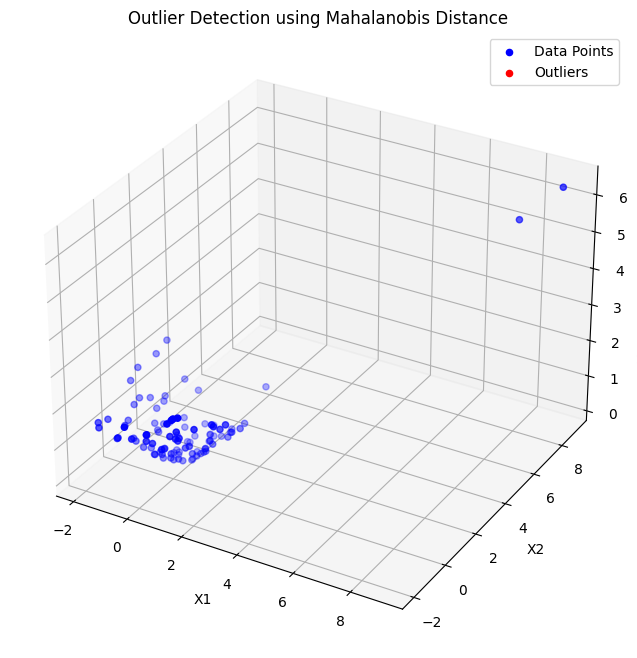


Original Dataset Statistics:
               X1          X2  Mahalanobis_Distance
count  102.000000  102.000000            102.000000
mean     0.248108    0.281463              1.102600
std      1.478963    1.459212              0.878770
min     -1.852725   -1.915781              0.170231
25%     -0.554778   -0.512700              0.545745
50%      0.108116    0.218681              0.876344
75%      0.715866    0.715485              1.439953
max      9.000000    9.000000              6.315065

Dataset Statistics after Removing Outliers:
               X1          X2  Mahalanobis_Distance
count  102.000000  102.000000            102.000000
mean     0.248108    0.281463              1.102600
std      1.478963    1.459212              0.878770
min     -1.852725   -1.915781              0.170231
25%     -0.554778   -0.512700              0.545745
50%      0.108116    0.218681              0.876344
75%      0.715866    0.715485              1.439953
max      9.000000    9.000000            

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2
from mpl_toolkits.mplot3d import Axes3D

# Generate multivariate student data
np.random.seed(42)
data = np.random.multivariate_normal(mean=[0, 0], cov=[[1, 0.5], [0.5, 1]], size=100)

# Introduce outliers
outliers = np.array([[8, 8], [9, 9]])
data = np.concatenate([data, outliers])

df = pd.DataFrame(data, columns=['X1', 'X2'])

def mahalanobis_distance(x, mean, inv_cov_matrix):
    # Center the data
    centered_data = x - mean

    # Calculate Mahalanobis Distance
    mahalanobis_dist = np.sqrt(np.dot(centered_data, np.dot(inv_cov_matrix, centered_data)))

    return mahalanobis_dist

# Ensure data is of type float
df[['X1', 'X2']] = df[['X1', 'X2']].astype(float)

# Center the data
mean = np.mean(df[['X1', 'X2']], axis=0)

# Calculate the covariance matrix
cov_matrix = np.cov(df[['X1', 'X2']], rowvar=False)

# Calculate the inverse of the covariance matrix
inv_cov_matrix = np.linalg.inv(cov_matrix)

# Calculate Mahalanobis Distance for each data point
df['Mahalanobis_Distance'] = df.apply(lambda row: mahalanobis_distance(row[['X1', 'X2']], mean, inv_cov_matrix), axis=1)

# Set a significance level for outlier detection
alpha = 0.01
chi2_threshold = chi2.ppf(1 - alpha, df=2)  # df is the degrees of freedom, which is the number of features

# Identify outliers
outliers = df[df['Mahalanobis_Distance'] > chi2_threshold]

# Drop outliers from the dataframe
df_no_outliers = df[df['Mahalanobis_Distance'] <= chi2_threshold]

# Visualize the data and outliers in 3D space
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot all data points in blue
ax.scatter(df_no_outliers['X1'], df_no_outliers['X2'], df_no_outliers['Mahalanobis_Distance'], color='blue', label='Data Points')

# Plot outliers in red
ax.scatter(outliers['X1'], outliers['X2'], outliers['Mahalanobis_Distance'], color='red', label='Outliers')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Mahalanobis Distance')
ax.set_title('Outlier Detection using Mahalanobis Distance')

plt.legend()
plt.show()

# Describe changes in the dataset
print("\nOriginal Dataset Statistics:")
print(df.describe())

print("\nDataset Statistics after Removing Outliers:")
print(df_no_outliers.describe())

Clustering

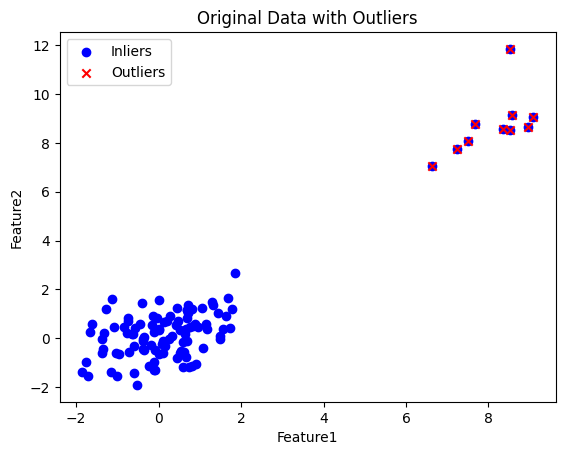

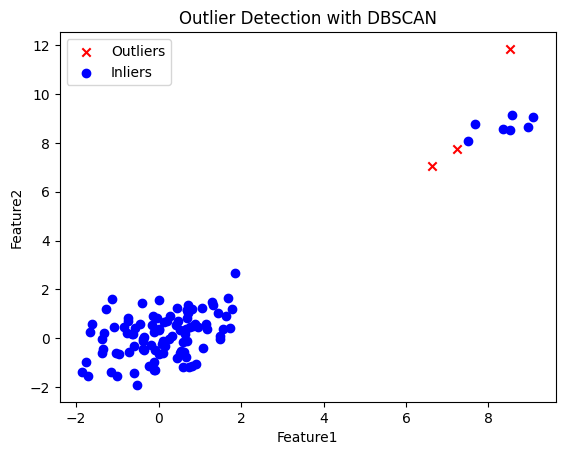

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Generate example data
np.random.seed(42)
data = np.random.multivariate_normal(mean=[0, 0], cov=[[1, 0.5], [0.5, 1]], size=100)
outliers = np.random.multivariate_normal(mean=[8, 8], cov=[[1, 0], [0, 1]], size=10)
data_with_outliers = np.vstack([data, outliers])

# Create a DataFrame
df = pd.DataFrame(data_with_outliers, columns=['Feature1', 'Feature2'])

# Visualize the data
plt.scatter(df['Feature1'], df['Feature2'], color='blue', label='Inliers')
plt.scatter(outliers[:, 0], outliers[:, 1], color='red', marker='x', label='Outliers')  # Use 'x' as the marker for outliers
plt.title('Original Data with Outliers')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend()
plt.show()

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# Apply DBSCAN for outlier detection
dbscan = DBSCAN(eps=0.4, min_samples=5)
df['Outlier'] = dbscan.fit_predict(data_scaled)

# Visualize the results
plt.scatter(df['Feature1'][df['Outlier'] == -1], df['Feature2'][df['Outlier'] == -1], color='red', marker='x', label='Outliers')
plt.scatter(df['Feature1'][df['Outlier'] != -1], df['Feature2'][df['Outlier'] != -1], color='blue', label='Inliers')
plt.title('Outlier Detection with DBSCAN')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend()
plt.show()

Multivariate Trimming

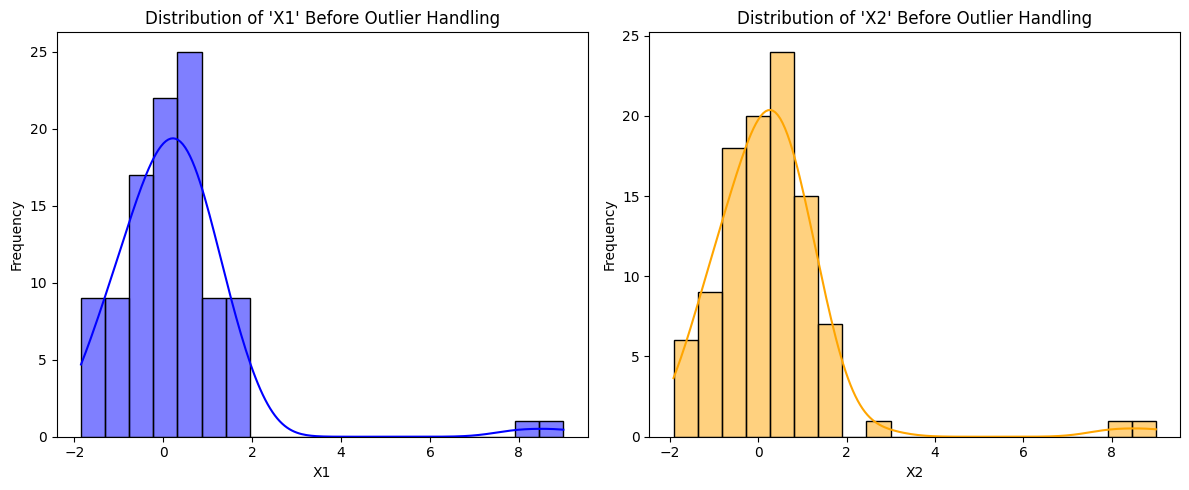

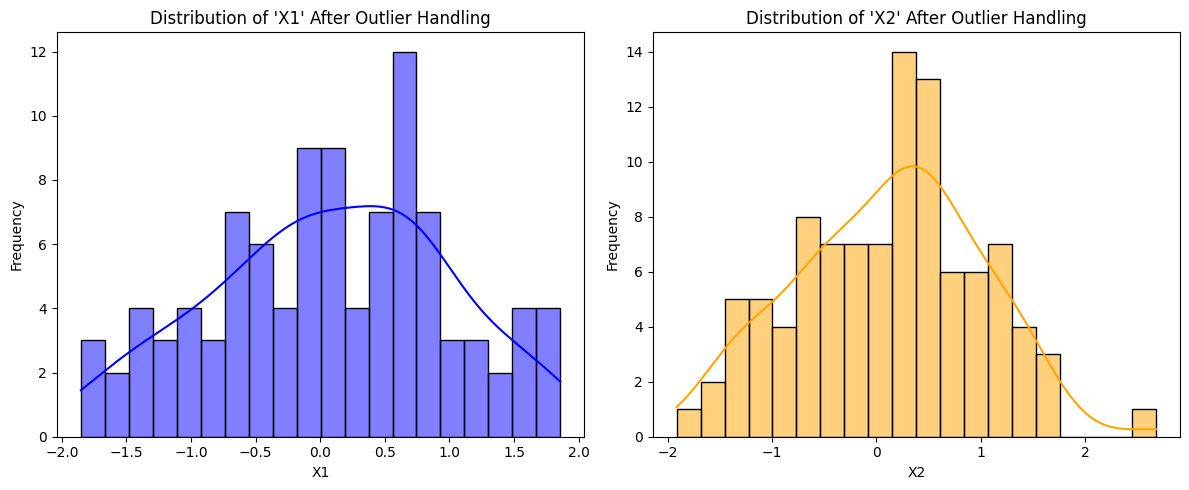

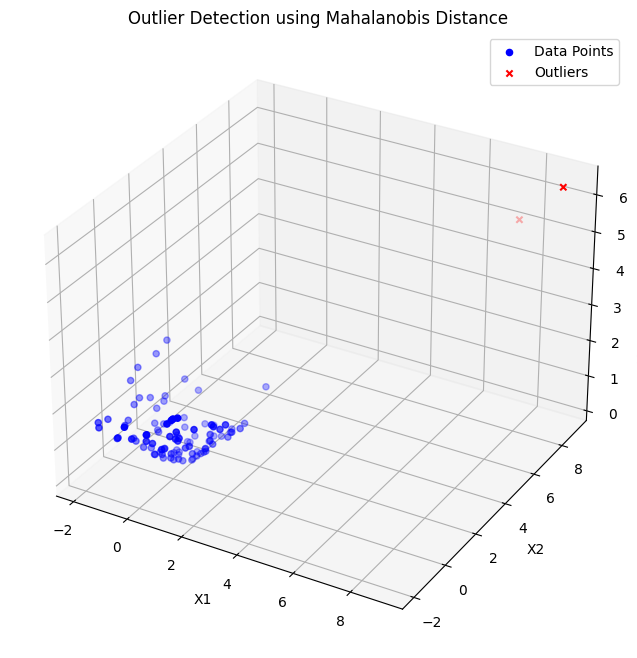


Original Dataset Statistics:
               X1          X2  Mahalanobis_Distance
count  102.000000  102.000000            102.000000
mean     0.248108    0.281463              1.102600
std      1.478963    1.459212              0.878770
min     -1.852725   -1.915781              0.170231
25%     -0.554778   -0.512700              0.545745
50%      0.108116    0.218681              0.876344
75%      0.715866    0.715485              1.439953
max      9.000000    9.000000              6.315065

Dataset Statistics after Removing Outliers:
               X1          X2  Mahalanobis_Distance
count  100.000000  100.000000            100.000000
mean     0.083070    0.117093              1.005581
std      0.907373    0.880592              0.547995
min     -1.852725   -1.915781              0.170231
25%     -0.574554   -0.526337              0.534075
50%      0.088743    0.200745              0.874940
75%      0.699309    0.707639              1.391190
max      1.857815    2.679717            

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2
from mpl_toolkits.mplot3d import Axes3D

# Generate multivariate student data
np.random.seed(42)
data = np.random.multivariate_normal(mean=[0, 0], cov=[[1, 0.5], [0.5, 1]], size=100)

# Introduce outliers
outliers = np.array([[8, 8], [9, 9]])
data = np.concatenate([data, outliers])

df = pd.DataFrame(data, columns=['X1', 'X2'])

def mahalanobis_distance(x, mean, inv_cov_matrix):
    # Center the data
    centered_data = x - mean

    # Calculate Mahalanobis Distance
    mahalanobis_dist = np.sqrt(np.dot(centered_data, np.dot(inv_cov_matrix, centered_data)))

    return mahalanobis_dist

# Ensure data is of type float
df[['X1', 'X2']] = df[['X1', 'X2']].astype(float)

# Center the data
mean = np.mean(df[['X1', 'X2']], axis=0)

# Calculate the covariance matrix
cov_matrix = np.cov(df[['X1', 'X2']], rowvar=False)

# Calculate the inverse of the covariance matrix
inv_cov_matrix = np.linalg.inv(cov_matrix)

# Calculate Mahalanobis Distance for each data point
df['Mahalanobis_Distance'] = df.apply(lambda row: mahalanobis_distance(row[['X1', 'X2']], mean, inv_cov_matrix), axis=1)

# Set a significance level for outlier detection
alpha = 0.1
chi2_threshold = chi2.ppf(1 - alpha, df=2)  # df is the degrees of freedom, which is the number of features

# Identify outliers
outliers = df[df['Mahalanobis_Distance'] > chi2_threshold]

# Drop outliers from the dataframe
df_no_outliers = df[df['Mahalanobis_Distance'] <= chi2_threshold]

# Visualize the distribution plots before and after removing outliers
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Distribution of 'X1' Before Outlier Handling")
sns.histplot(df['X1'], bins=20, color='blue', kde=True)
plt.xlabel('X1')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.title("Distribution of 'X2' Before Outlier Handling")
sns.histplot(df['X2'], bins=20, color='orange', kde=True)
plt.xlabel('X2')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Distribution of 'X1' After Outlier Handling")
sns.histplot(df_no_outliers['X1'], bins=20, color='blue', kde=True)
plt.xlabel('X1')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.title("Distribution of 'X2' After Outlier Handling")
sns.histplot(df_no_outliers['X2'], bins=20, color='orange', kde=True)
plt.xlabel('X2')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Visualize the data and outliers in 3D space
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot all data points in blue
ax.scatter(df_no_outliers['X1'], df_no_outliers['X2'], df_no_outliers['Mahalanobis_Distance'], color='blue', label='Data Points')

# Plot outliers with a different symbol (e.g., 'x') in red
ax.scatter(outliers['X1'], outliers['X2'], outliers['Mahalanobis_Distance'], color='red', marker='x', label='Outliers')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Mahalanobis Distance')
ax.set_title('Outlier Detection using Mahalanobis Distance')

plt.legend()
plt.show()

# Describe changes in the dataset
print("\nOriginal Dataset Statistics:")
print(df.describe())

print("\nDataset Statistics after Removing Outliers:")
print(df_no_outliers.describe())